0.8


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

0.9


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

1.0


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

1.1


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

1.2000000000000002


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

feedback and memory are, respectively:
[86, 119, 160.8, 192, 257]
[26, 39, 45.2, 53, 67]
feedback and memory percents are, respectively:
[-46.25, -25.625, 0.5000000000000071, 20.0, 60.625]
[-42.22222222222222, -13.333333333333332, 0.44444444444445075, 17.77777777777778, 48.888888888888886]


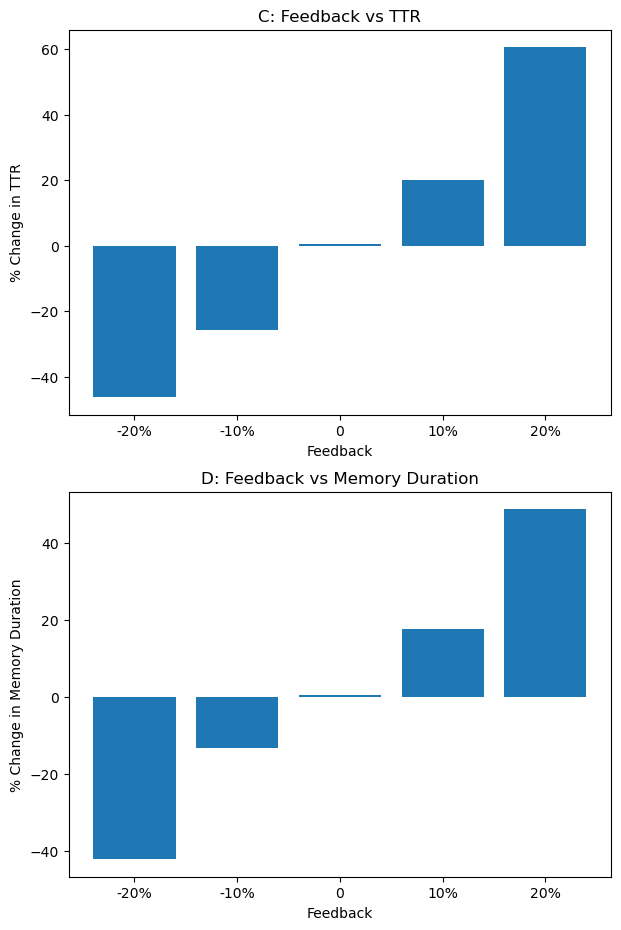

In [3]:
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
# with and without seed
import numpy as np
import random
import pickle
# July 4, 2021
# accuracy v speed
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
# with and without seed
import numpy as np
import random
import pickle
# Stewart change
# if decrease number neurons become less accurate?
d = 128  # the dimensionality of the vectors
# note dimension
SDT_variable = 1
proportion_ablate = 0.0
noise_std = 0.000000000000005
time_interval = 1.0
wait =  0.0
feedback_synapse = 0.1
threshold = 0.8 

# Empty arrays to store values on each iteration
all_numbers = []
xvals = []
all_numbers_noise = []
xvals_noise = []
memory = []

import csv

for z in range (8,13,1):
    feedback = 0.10
    feedback = z * feedback
    print(feedback)
    
    with spa.Network(seed = None) as model:
        noise = nengo.Node(nengo.processes.WhiteNoise(nengo.dists.Gaussian (0,noise_std)), size_out = d)
        vocab = spa.Vocabulary(d)
        vocab.populate("RED; BLUE; GREEN; NOISE")
        BLUE = vocab.parse('BLUE')
        RED = vocab.parse('RED')
        GREEN = vocab.parse('GREEN')
        NOISE = vocab.parse('NOISE')

        Color = spa.State(vocab,  subdimensions = 16, neurons_per_dimension = 50,\
                          represent_cc_identity = False, feedback_synapse = 0.1, feedback = feedback)
        nengo.Connection(noise,Color.input, synapse = 0.01)

        def input(t):
            if t < 1:
                return RED 
            elif t < 2:
                return BLUE  
            elif t < 3:
                return GREEN 
            else:
                return  '0'
        input_transcode = spa.Transcode(function = input, output_vocab = vocab)
        input_transcode >> Color
        probe_Color = nengo.Probe(Color.output, synapse = 0.01)



        with nengo.Simulator(model) as sim:  # Create the simulator
                    for j in range (0, int(d/16)):
                        ens = Color.all_ensembles[j]

                    sim.run(1.5)  

                    numbers  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                    pickle.dump(numbers, open("June30", "wb"))
                    
                    # Get values where data crosses threshold at different loss percents
                    value = 0.8
                    absolute_val_array = np.abs(numbers[1000:1500,1] - value)
                    smallest_difference_index = absolute_val_array.argmin()
                    closest_element = smallest_difference_index
                    Point = closest_element
                    all_numbers.append(Point)
                    xvals.append(feedback)
                    
                    value = 0.8
                    absolute_val_array = np.abs(numbers[1000:1500,0] - value)
                    smallest_difference_index = absolute_val_array.argmin()
                    closest_element = smallest_difference_index
                    Point = closest_element
                    memory.append(Point)
   

 #------------------------------------------------------------ Generate Scatterplot
print('feedback and memory are, respectively:')
print(all_numbers)
print(memory) 

all_numbers[:] = [(x - 160) / 1.60 for x in all_numbers] #make percent
memory[:] = [(x - 45) / 0.45 for x in memory] #make percent

print('feedback and memory percents are, respectively:')
print(all_numbers)
print(memory) 

fig, axs = plt.subplots(2, figsize=(7,11))

axs[1].set_title("D: Feedback vs Memory Duration" )
axs[1].set_xlabel('Feedback')
axs[1].set_ylabel("% Change in Memory Duration")
xvals = ['-20%','-10%','0','10%','20%']
axs[1].bar(xvals,memory)
                  
axs[0].set_title("C: Feedback vs TTR" )
axs[0].set_xlabel('Feedback')
axs[0].set_ylabel("% Change in TTR")
axs[0].bar(xvals,all_numbers) 
 
#plt.title("Feedback vs TTR")      
fig.savefig('Feedback_TTR_Memory.jpg')    
fig.savefig('Feedback_TTR_Memory.png') 
fig.savefig('Feedback_TTR_Memory.svg')   